
# Matplotlib - Graphes en Python - Initiation

Ce didacticiel couvre les usages classiques et les bonnes pratiques pour vous aider à bien démarrer l’utilisation de  **Matplotlib**.

Ce document est basé sur [cette page de la doc officielle de Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

La [documentation officielle de Matplotlib](https://matplotlib.org/stable/index.html) est une vaste ressource que vous pourrez consulter par la suite.

In [1]:
# imports canoniques
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Un exemple simple

Matplotlib graphe vos données sur une [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) (une fenêtre, un widget Jupyter, etc…). Chacune de ces Figures peut contenir un ou plusieurs [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), ie des zones dans lesquelles des points peuvent être spécifiés en termes de coordonnées x et y (ou theta et r dans un graphe en coordonnées polaires, ou encore x,y et z dans un graphe 3D). 

La manière la plus simple de créer une Figure avec un Axe est d’utiliser `plt.subplots` qui renvoie une figure **et** un Axe, puis d’utiliser la méthode `.plot()` de l’Axe avec deux jeux de données représentant les valeurs en x et les valeurs en y correspondantes.


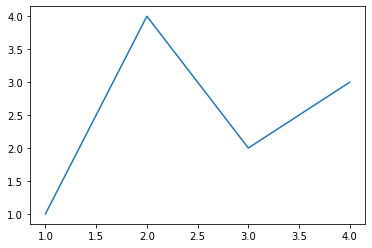

In [2]:
fig, ax = plt.subplots()  # Crée une figure contenant un unique Axe.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  
# trace les points fournis. le premier argument est interprété comme une liste de valeurs pour x,
# le deuxième une liste de valeurs pour y

## Anatomie d’une Figure

Voici la nomenclature des composants d’une Figure de Matplotlib.

<img src="https://matplotlib.org/stable/_images/anatomy.png">

### [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)

La Figure est l’image entière générée par Matplotlib. La Figure contient tous les `Axes` enfants, des `Artistes` (les titres, la légende, les barres de couleurs, etc) et même des sous-figures imbriquées.

La manière la plus simple de créer une nouvelle Figure est avec `pyplot`:


    fig = plt.figure()  # une Figure vide, sans Axes
    fig, ax = plt.subplots()  # une Figure avec un unique Axes
    fig, axs = plt.subplots(2, 2)  # une Figure avec une grille 2x2 d’Axes
    
En général, c’est plus pratique de créer les `Axes` conjointement avec la `Figure`, mais on peut aussi ajouter des `Axes` plus tard.

### [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)

Un objet `Axes`est un `Artist` attaché à une `Figure` qui contient une région pour tracer des données, et généralement inclus 2 (ou 3 dans les cas en 3D) objets `Axis` (faites attention à la différence entre **Axes** et **Axis**) qui nous donnent des graduations (`ticks`) et des libellés de graduation pour donner une échelle aux données sur les `Axes`.

Chaque `Axes` a également un `title` un `x-label` et un `y-label`.

La classe `Axes` et ses méthodes sont le point d’entrée principal pour travailler avec l’interface de Programmation Orientée Objet, et la plupart des méthodes pour tracer sont définies dans cette classe. (par exemple `ax.plot()` montrée plus haut).

### [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)

Ces objets fixent l’échelle et les limites du graphes, et génèrent les `ticks` (les marques sur les axes) et les `ticks labels` (chaînes de caractères qui donnent un libellé aux marques). La position des marques est déterminée par un objet `matplotlib.ticker.Locator`et le libellé des marques est formaté par un objet `matplotlib.ticker.Formatter`. La combinaison d’un `Locator` et d’un `Formatter` adaptés donne un grand contrôle sur l’emplacement et le texte des marques.


### [`Artist`](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)

Tout ce qui est visible sur une `Figure` est un `Artist` (y compris les objets `Figure`, `Axes` et `Axis`). Cela inclus les objets `Text`, `LineD2`, `collections`, `Patch`, etc…

Quand la Figure est affichée, tous les `Artists` sont dessinés sur le **canvas**. La plupart des `Artists` sont liés à un `Axes`, et ne peuvent pas être partagés par plusieurs `Axes`, ou passer de l’un à l’autre.

## Types d’entrées des fonctions de traçage 

Les fonctions de traçage attendent un objet `numpy.array` en entrée, ou un objet qui peut être passé à la fonction `numpy.asarray()` qui va le transformer en un array numpy.

Les classes qui sont similaires à des `numpy.array` comme les objets `numpy.matrix` peuvent ne pas fonctionner exactement comme attendu. La convention est de les convertir en `numpy.array` avant de les tracer.
Par exemple, pour convertir un objet `numpy.matrix` :


     b = np.matrix([[1, 2], [3, 4]])
     b_asarray = np.asarray(b)

La plupart des méthodes de traçage peuvent aussi parcourir un objet `dict`ou similaire comme un 
`numpy.recarray`, ou une `pandas.DataFrame`.  Matplotlib vous permet de fournir un argument `data=` et de tracer des graphes en passant les chaînes correspondant aux variabes *x* et *y*.



Text(0, 0.5, 'entry b')

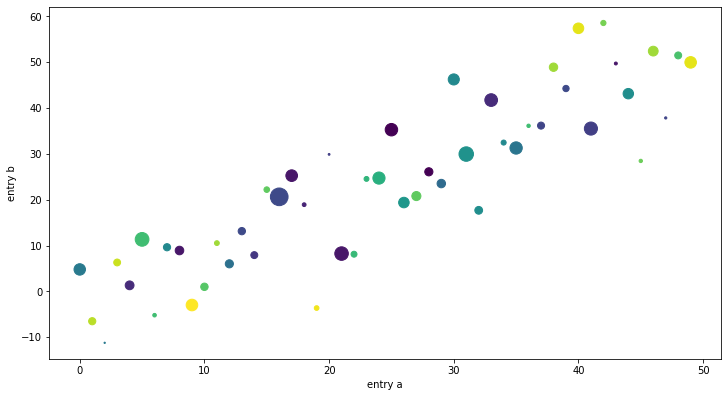

In [3]:
np.random.seed(19680801)  # graine pour le générateur de nombre aléatoire.

data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')

ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')


## Styles de Code

### L'interface orientée objet et l’interface pyplot

Comme vu plus haut, il y a en réalité 2 manières d'utiliser Matplotlib :

1. Créer des objets Figure et Axes explicitement, puis appeler leurs méthodes (le style orienté objet)
2. Se servir de `pyplot` pour créer automatiquement les Figures et Axes, et utiliser les fonctions de `pyplot` pour tracer

Exemple du style OO :

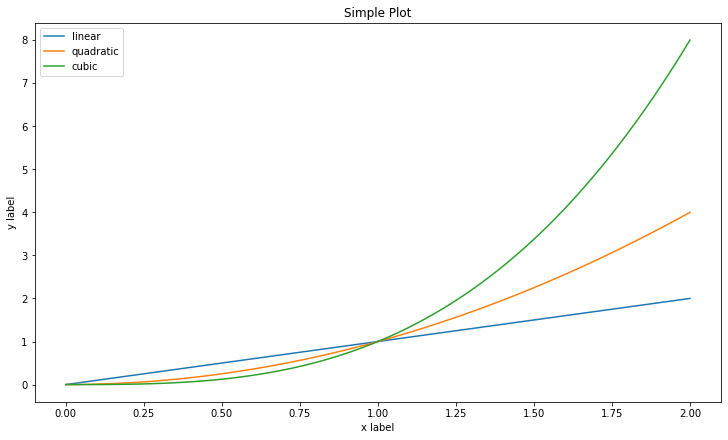

In [4]:
x = np.linspace(0, 2, 100)  # échantillon pour x.


fig, ax = plt.subplots(figsize=(10, 6), layout='constrained') # création de la figure et de l’axes

ax.plot(x, x, label='linear')  # méthode plot sur l’axes
ax.plot(x, x**2, label='quadratic')  # on plot encore plus de données
ax.plot(x, x**3, label='cubic')  # ... et encore.
ax.set_xlabel('x label')  # on ajoute un libellé sur l’axe des x.
ax.set_ylabel('y label')  # idem pour l’axe des y
ax.set_title("Simple Plot")  # on ajoute un titre, toujours avec une méthode sur l’objet Axes.
ax.legend();  # enfin, on ajoute la légende, encore et toujours avec une méthode de l’axes.

Exemple du style `pyplot`, qui utilise des fonctions de pyplot :



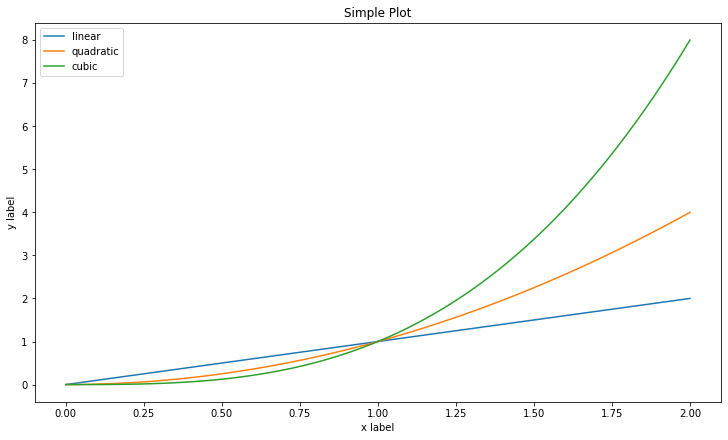

In [5]:
x = np.linspace(0, 2, 100)  # échantion pour x.

plt.figure(figsize=(10, 6), layout='constrained')
plt.plot(x, x, label='linear')  # on plot sur les Axes, mais implicitement
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

La documentation officielle de **Matplotlib** utilise les deux styles. En général, il est préférable d’utiliser le style OO, particulièrement pour les graphes les plus personnalisés, et au sein de fonctions définies pour être utilisées plusieurs fois au sein d’un projet majeur, mais le style `pyplot` est très pratique pour produire un graphe simple rapidement.


<div class="alert alert-info">
    
#### Note
    
Vous pouvez tomber sur de vieux exemples qui utilisent l’interface ``pylab``  via ``from pylab import *``. Cette approche est totalement obsolète et n’est plus supportée.

</div>

### Créer des fonctions 

Si vous avez besoin de faire le même graphe plusieurs fois, avec des données différentes, vous pouvez partir de l’exemple suivant :

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

que vous pouvez ensuite utiliser plusieurs fois pour peupler des sous-graphes :



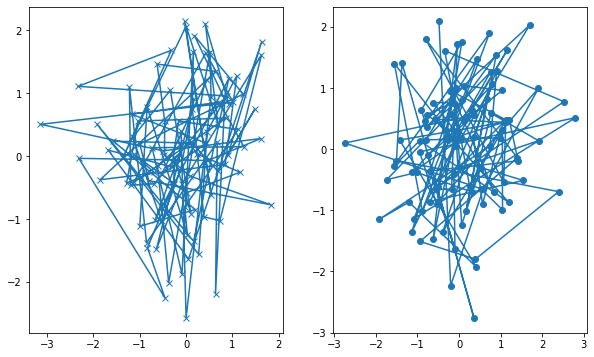

In [7]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # 4 jeux de données aléatoires
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# 2 appels à la fonction my_plotter()
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

## Donner du style aux Artistes

La plupart des méthodes on des options de style pour les `Artists` accessibles soit quand une méthode qui trace est appelée, our par un `setter` sur un `Artiste`. Dans le graphe ci-dessous on a manuellement fixé la couleur, largeur de trait et style de ligne des Artistes crées par la méthode `.plot()` puis réglé le style de ligne après coup avec avec `set_linestyle()` sur l’objet `Artiste` lui-même.



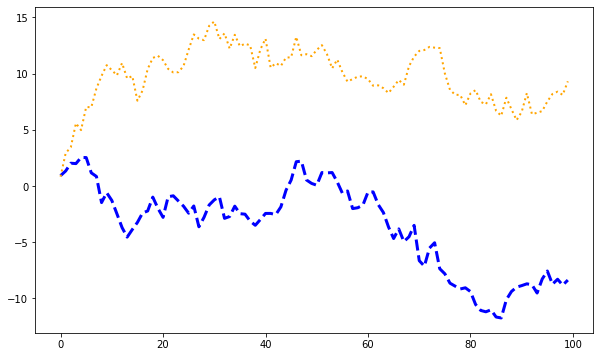

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2) # objet artiste ligne capturé dans une variable
l.set_linestyle(':'); # utilisation de la méthode sur l’objet artiste

### Couleurs

Matplotlib a une palette de couleurs très flexible qui est acceptée par la plupart des Artistes, voir [ce didacticiel dédié aux couleurs](https://matplotlib.org/stable/tutorials/colors/colors.html) pour une liste des spécifications.

Certains `Artist` peuvent prendre plusieurs couleurs, par exemple dans un graphe `scatter`, l’intérieur et la bordure des marqueurs peuvent être d’une couleur différente :



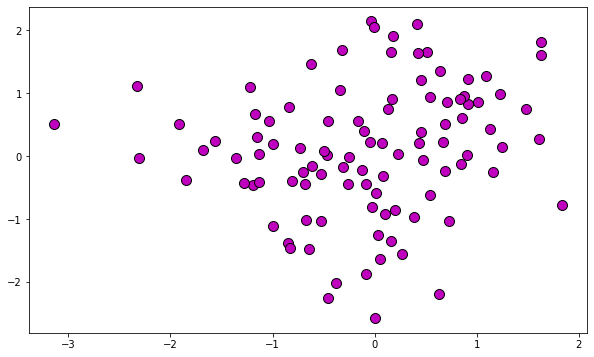

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data1, data2, s=100, facecolor='m', edgecolor='k'); # m = magenta, k = black

### Linewidths, linestyles, et markersizes

La largeur de ligne est typiquement exprimée en points typographiques (1 pt = 1/72 de pouce, oui ces unités américaines étranges) et l’option est disponible pour les Artistes avec des lignes tracées. De même, les lignes peuvent avoir un `linestyle`, voir [https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).


Les tailles des `marker` dépendent de la méthode utilisées. `Axes.plot()` spécifie la taille des marqueur en points, et il s'agit généralement diamètre, ou de la largeur du marqueur. `Axes.scatter()` spécifie la taille des marqueurs comme approximativement proportionnelle à la zone visuelle du marqueur. Il y a une gamme de style de marqueurs disponible sous la forme de [codes "string"](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) ou bien vous pouvez [définir vos propres styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html) :


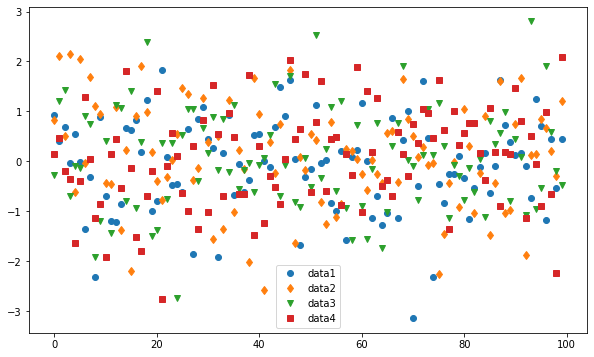

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## Libeller des graphes

### Libellés des Axes et texte

`Axes.set_xlabel`, `Axes.set_ylabel`, et `Axes.set_title` sont utilisés pour ajouter du texte aux emplacements indiqués. Du texte peut être directement ajouté sur les graphes avec `Axes.text`:



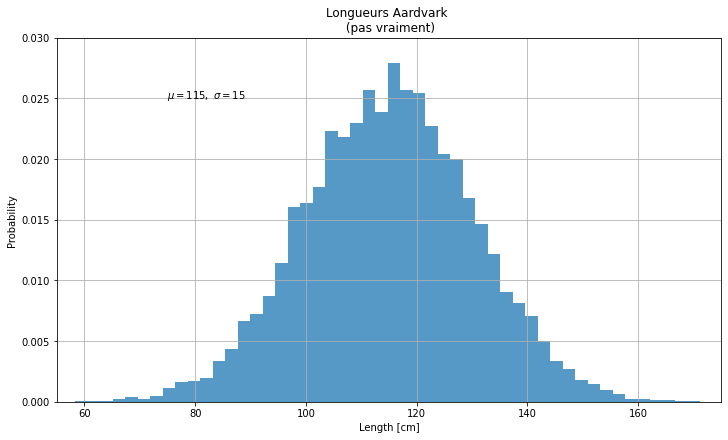

In [16]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
# l’histogramme des données

n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Longueurs Aardvark \n (pas vraiment)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

Toutes les fonctions `Axes.text` renvoient une instance de l’objet `matplotlib.text.Text`. Tout comme les lignes vues plus haut, vous pouvez personnaliser les propriétés en passant des arguments aux fonctions texte :

In [13]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

Ces propriétées sont détaillées dans [https://matplotlib.org/stable/tutorials/text/text_props.html](https://matplotlib.org/stable/tutorials/text/text_props.html).

### Utiliser des expressions mathématiques dans les textes

Matplotlib accepte des expressions d’équation TeX dans tout objet texte (libellé ou autre).
Par exemple pour écrire $sigma_i=15$ dans le titre, vous pouvez écrire l’expression en TeX, encadrée par deux symboles dollar $ :

    ax.set_title(r'$\sigma_i=15$')

le `r` qui précède la string du titre signifie que la string est *raw*, est à dire à prendre telle quelle, sans traiter les `\` comme des caractères d’échappement. Matplotlib a un interpréteur d’expressions TeX et un moteur de rendu, et fourni sa propre police de caractères mathématiques. Vous pouvez égalemenet utiliser LaTeX directement pour formater votre texte et incorporer le résultat directement sur vos Figures.

play figures or
saved postscript – see :doc:`/tutorials/text/usetex`.

### Annotations

Vous pouvez annoter des points sur un graphe, souvent au moyen d’une flèche allant d’un texte en *xytext* vers un point *xy* :

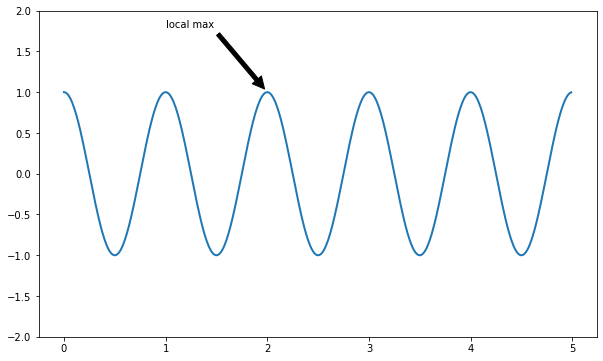

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(1, 1.8), #xy est la pointe de la flèche, xytext les coordonnées du texte
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

Dans cet exemple de base, *xy* et *xytext* sont en coordonnées directes.
Il y a d’autres systèmes de coordonnées que vous pouvez utiliser voir : [annotations de base](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial) et [annotations avancées](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation).

### Légendes

Souvent on veut identifier les différentes courbes grâce à une `Axes.legend()` :

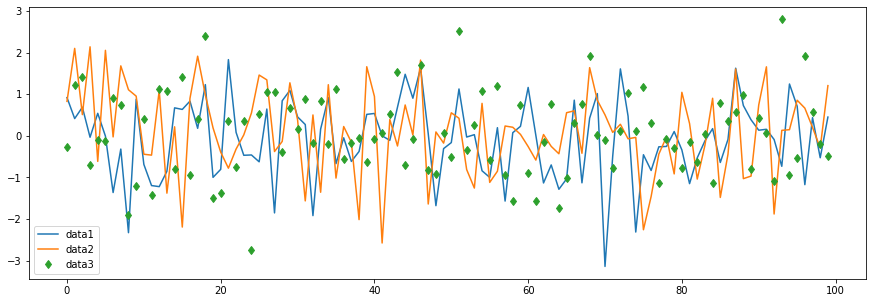

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

Les Légendes de Matplotlib sont très flexibles dans leur aspect, placement, et les Artistes qu’elles peuvent représenter. Ceci est présenté plus en détail dans [ce guide des légendes](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html).

## Échelles et ticks sur les Axis

Chaque Axes a 2 (ou parfois 3) objets `axis.Axis` représentant les axes x et y (et parfois z). Ils contrôlent l’échelle des Axis, les `locators` des ticks et leurs `formatters`. 


### Échelles

En plus de l’échelle linéaire, Matplotlib permet des échelles non-linéaires, comme l’échelle logarithmique. Voir [https://matplotlib.org/stable/gallery/scales/scales.html](https://matplotlib.org/stable/gallery/scales/scales.html) pour plus d’exemples.

Ci-dessous nous choisissons l’échelle manuellement :



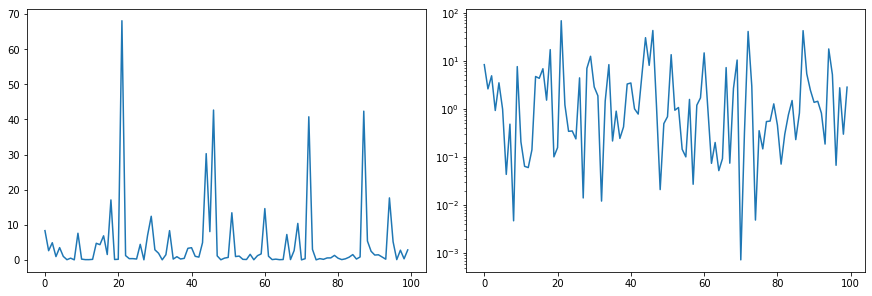

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')
xdata = np.arange(100)  
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data); # mêmes données tracées, mais à droite avec échelle log sur les y

### Tick locators and formatters

Each Axis has a tick *locator* and *formatter* that choose where along the
Axis objects to put tick marks.  A simple interface to this is
`~.Axes.set_xticks`:



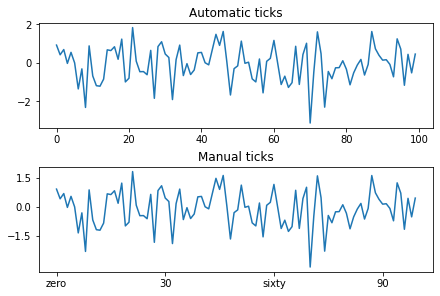

In [47]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

Different scales can have different locators and formatters; for instance
the log-scale above uses `~.LogLocator` and `~.LogFormatter`. See
:doc:`/gallery/ticks/tick-locators` and
:doc:`/gallery/ticks/tick-formatters` for other formatters and
locators and information for writing your own.

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as
well as floating point numbers.  These get special locators and formatters
as appropriate.  For dates:



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

For more information see the date examples
(e.g. :doc:`/gallery/text_labels_and_annotations/date`)

For strings, we get categorical plotting (see:
:doc:`/gallery/lines_bars_and_markers/categorical_variables`).



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

One caveat about categorical plotting is that some methods of parsing
text files return a list of strings, even if the strings all represent
numbers or dates.  If you pass 1000 strings, Matplotlib will think you
meant 1000 categories and will add 1000 ticks to your plot!


### Additional Axis objects

Plotting data of different magnitude in one chart may require
an additional y-axis. Such an Axis can be created by using
`~.Axes.twinx` to add a new Axes with an invisible x-axis and a y-axis
positioned at the right (analogously for `~.Axes.twiny`). See
:doc:`/gallery/subplots_axes_and_figures/two_scales` for another example.

Similarly, you can add a `~.Axes.secondary_xaxis` or
`~.Axes.secondary_yaxis` having a different scale than the main Axis to
represent the data in different scales or units. See
:doc:`/gallery/subplots_axes_and_figures/secondary_axis` for further
examples.



In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(8, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [°]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [rad]')

## Color mapped data

Often we want to have a third dimension in a plot represented by a colors in
a colormap. Matplotlib has a number of plot types that do this:



In [ ]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');

### Colormaps

These are all examples of Artists that derive from  `~.ScalarMappable`
objects.  They all can set a linear mapping between *vmin* and *vmax* into
the colormap specified by *cmap*.  Matplotlib has many colormaps to choose
from (:doc:`/tutorials/colors/colormaps`) you can make your
own (:doc:`/tutorials/colors/colormap-manipulation`) or download as
`third-party packages
<https://matplotlib.org/mpl-third-party/#colormaps-and-styles>`_.

### Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as
in the ``LogNorm`` example above.  We do this by supplying the
ScalarMappable with the *norm* argument instead of *vmin* and *vmax*.
More normalizations are shown at :doc:`/tutorials/colors/colormapnorms`.

### Colorbars

Adding a `~.Figure.colorbar` gives a key to relate the color back to the
underlying data. Colorbars are figure-level Artists, and are attached to
a ScalarMappable (where they get their information about the norm and
colormap) and usually steal space from a parent Axes.  Placement of
colorbars can be complex: see
:doc:`/gallery/subplots_axes_and_figures/colorbar_placement` for
details.  You can also change the appearance of colorbars with the
*extend* keyword to add arrows to the ends, and *shrink* and *aspect* to
control the size.  Finally, the colorbar will have default locators
and formatters appropriate to the norm.  These can be changed as for
other Axis objects.


## Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to
``fig = plt.figure()`` or ``fig2, ax = plt.subplots()``.  By keeping the
object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is
``plt.subplots()`` as used above.  One can achieve more complex layouts,
with Axes objects spanning columns or rows, using `~.pyplot.subplot_mosaic`.



In [ ]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

Matplotlib has quite sophisticated tools for arranging Axes: See
:doc:`/tutorials/intermediate/arranging_axes` and
:doc:`/tutorials/provisional/mosaic`.


## More reading

For more plot types see :doc:`Plot types </plot_types/index>` and the
:doc:`API reference </api/index>`, in particlar the
:doc:`Axes API </api/axes_api>`.

